In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
gw_df = pd.read_csv('../data/richers_1764.csv')

distance = 3.086e22
gw_df = gw_df / distance

# for future use
sampling_period = 0.00024354078

### Analysis

#### Notes

- Signals truncated 0.04956055s before bounce and roughly 0.04956055s after bounce, as provided by Matt's research paper

- All y values are in distance * strain. Where all distances are 10 kpc or 3.086e22m. Strain is * 1e-21.

#### All Signals

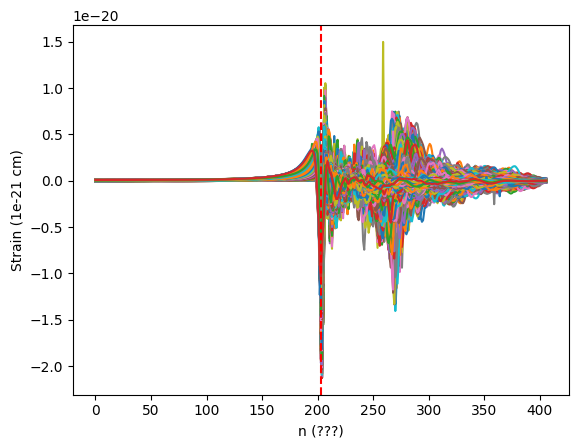

In [6]:
gw_df.plot(legend=False)

plt.xlabel('n (???)')
plt.ylabel('Strain (cm)')

# the core bounce is at n = 203
plt.axvline(x=203, color='r', linestyle='--')

plt.show()

#### 16 Random Signals

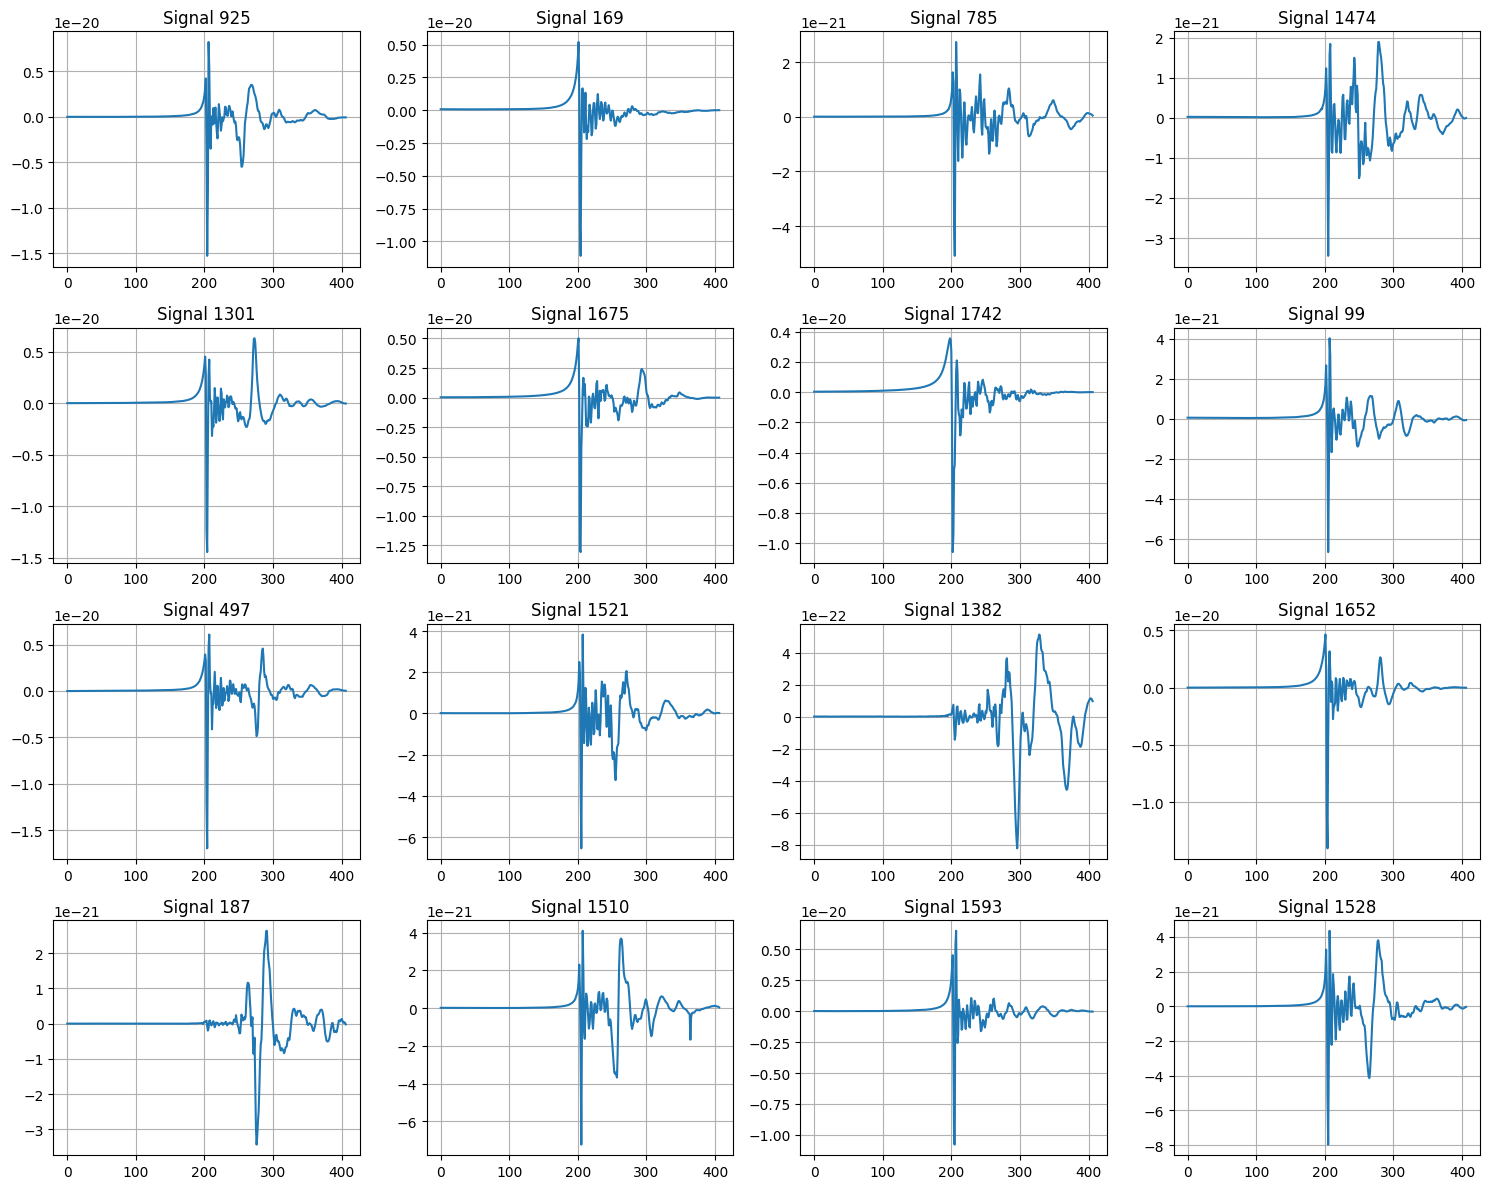

In [21]:
# select 16 random signals
random_index = np.random.randint(0, gw_df.shape[1], 16)
selected_signals = gw_df.iloc[:, random_index]  # Assuming the first 64 columns are the signals

num_rows = 4
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

axes = axes.flatten()

# plot each signal on a separate subplot
for i, ax in enumerate(axes):
    x = np.arange(len(selected_signals))
    y = selected_signals.iloc[:, i]
    ax.plot(x, y)
    ax.set_title(f'Signal {random_index[i]}')
    ax.grid(True)

for i in range(len(selected_signals), num_rows*num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### General Distribution of signals

- Needs a lot of work

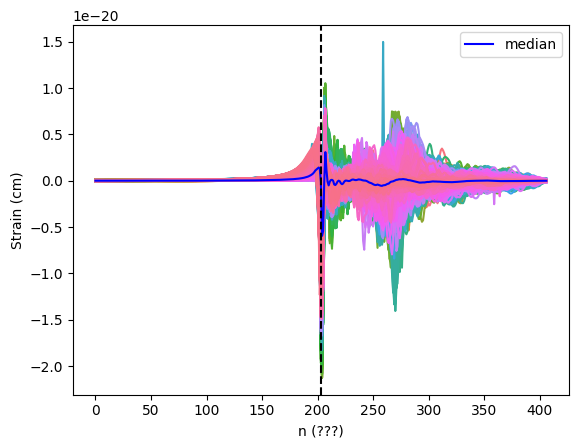

In [10]:
# convert the DataFrame from wide format to long format for seaborn
gw_df_long = pd.melt(gw_df.reset_index(), id_vars='index')

gw_df_long.columns = ['n (???)', 'Line', 'Strain (cm)']

# confidence intervals
sns.lineplot(x='n (???)', y='Strain (cm)', hue='Line', data=gw_df_long, errorbar=('ci', 95), n_boot=1000, legend=False)

median_line = gw_df.median(axis=1)
plt.plot(median_line.index, median_line.values, 'b-', label='median')

# the core bounce is at n = 203
plt.axvline(x=203, color='black', linestyle='--')  

plt.legend()
plt.show()